## Import libraries

In [1]:
from pathlib import Path

import isthmuslib
import numpy as np
import pandas as pd

from read_files import read_transactions_to_dataframe

## Set the path

In [2]:
top_data_directory: Path = Path.cwd() / ".." / "data" / "unpacked"

## Read in the transactions

In [3]:
df_all: pd.DataFrame = read_transactions_to_dataframe(top_data_directory)

# Peek the result
df_all.head()

,transaction,file
0,0200020200108802b00b9b05891028690e8f04fc030ac1...,/home/bird/Projects/GitHub/townforge_research/...
1,020002020010b60f9401d802e80569b401e60352d1038a...,/home/bird/Projects/GitHub/townforge_research/...
2,0200020200109704c903af05ce059204bf0411d0014253...,/home/bird/Projects/GitHub/townforge_research/...
3,020002020010e1068002a80a195adb092333a501ae014b...,/home/bird/Projects/GitHub/townforge_research/...
4,020002020010ac05fc04b4019903a70221f6038e02e001...,/home/bird/Projects/GitHub/townforge_research/...


## Some light feature engineering

In [4]:
# Add source labels
df_all["ref"] = ["ref" in x for x in df_all["file"]]
df_all["len"] = [len(x) for x in df_all["transaction"]]

# Split by label
df0: pd.DataFrame = df_all[df_all["ref"] == True]
df1: pd.DataFrame = df_all[df_all["ref"] == False]

## Viz

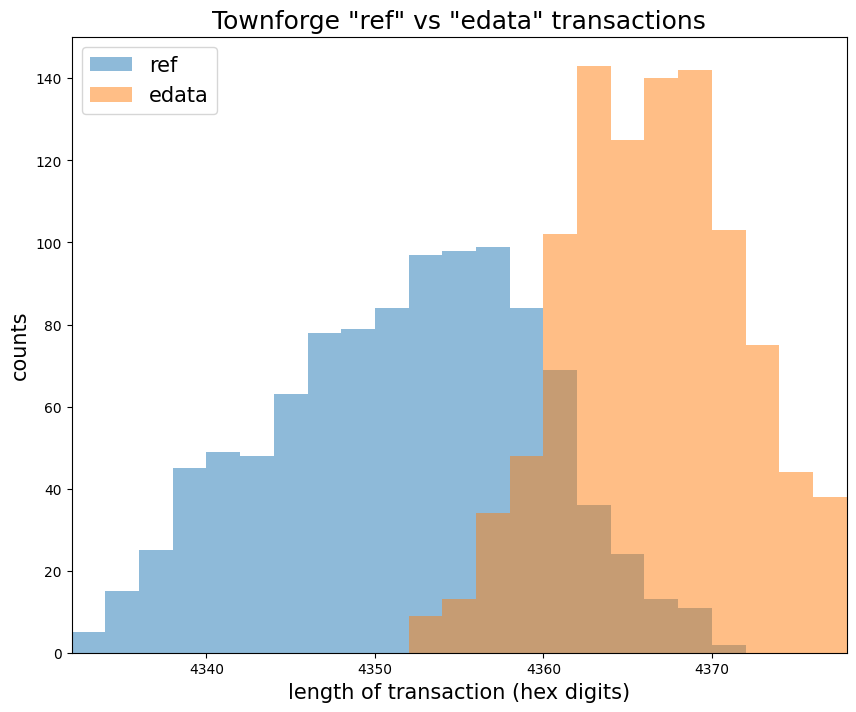

In [5]:
isthmuslib.hist(
    [df0["len"], df1["len"]],
    grid=False,
    legend_strings=["ref", "edata"],
    bins=np.arange(min(df_all["len"]), max(df_all["len"]), 2),
    xlabel="length of transaction (hex digits)",
    title='Townforge "ref" vs "edata" transactions',
);